# Hawkes Processes

## Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def algorithm(rate, mu, n):
    """
    Algorithm that computes interevent times and Hawkes intensity

    #Output: rate x_k, x_k
    """                                    
    # Paso 1
    u1 = np.random.uniform()
    if mu == 0:
        F1 = np.inf
    else:
        F1 = -np.log(u1) / mu

    # Paso 2
    u2 = np.random.uniform()
    if (rate - mu) == 0:
        G2 = 0
    else:
        G2 = 1 + np.log(u2) / (rate - mu)
        

    # Paso 3
    if G2 <= 0:
        F2 = np.inf
    else:
        F2 = -np.log(G2)

    # Paso 4
    xk = min(F1, F2)

    # Paso 5
    rate_tk = (rate - mu) * np.exp(-xk) + n + mu
    return rate_tk, xk 

# Raster plot

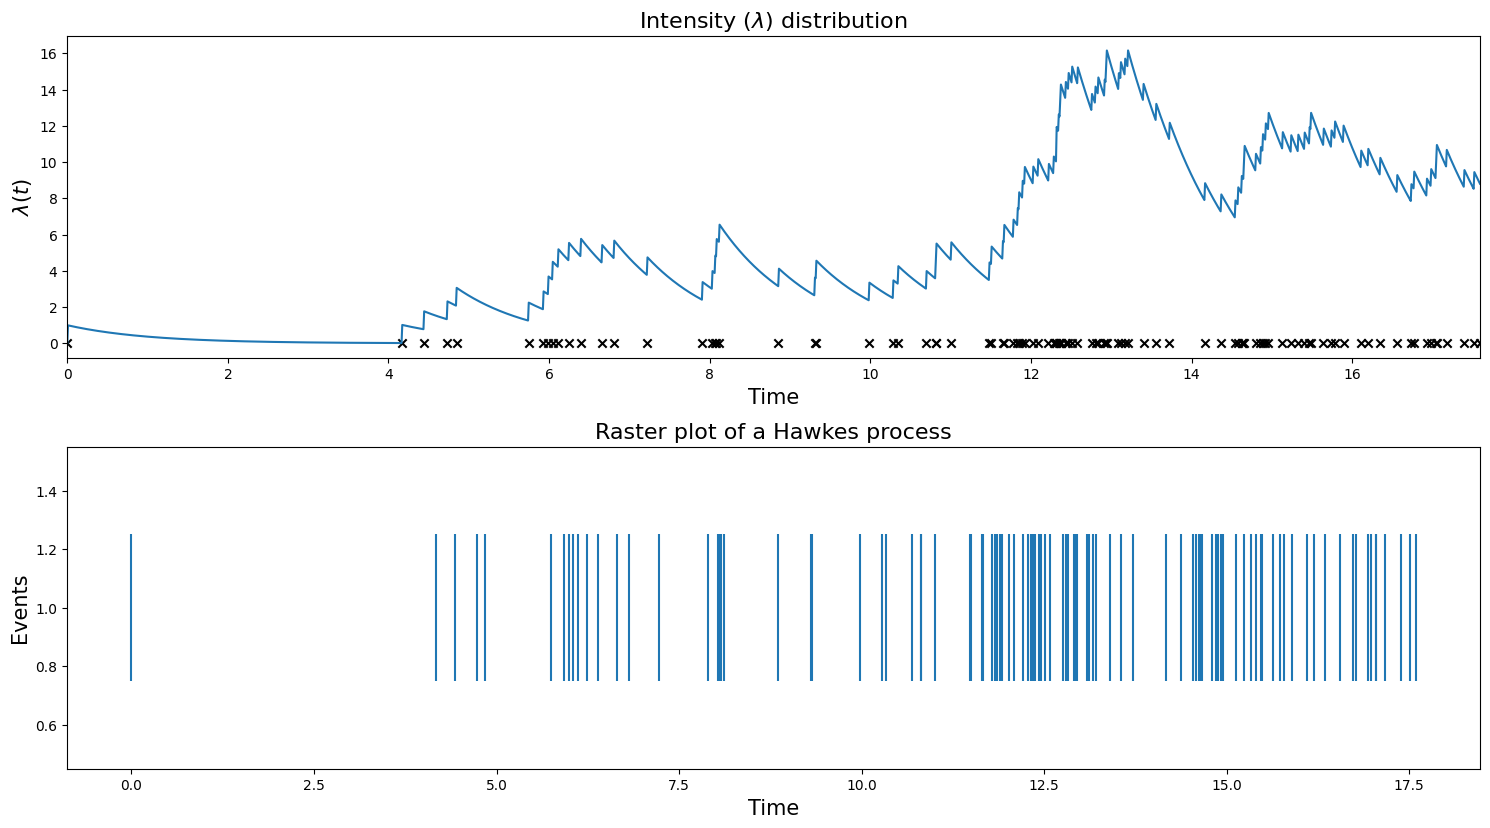

In [3]:
n_events = [0]
times_between_events = [0]
mu = 1
rate = [mu]
n=1
N = 10**2
for i in range(N): 
    rate_tk, xk = algorithm(rate[-1], mu, n)
    rate.append(rate_tk)
    times_between_events.append(xk)
    n_events.append(i + 1)

times = np.cumsum(times_between_events)

def intensity(past, t, mu):
    past = np.asarray(past)
    past = past[past < t]
    return mu * np.exp(-mu * (t - past)).sum()


x = np.linspace(0, max(times), 2000)
y = [intensity(times, t, mu) for t in x]

fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(3,1)


ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(x, y)
ax0.set(xlim=[0,max(times)])

ax0.scatter(times, np.random.random(len(times))*0.01, marker="x", color="black")
ax0.set_title('Intensity $(\lambda)$ distribution', fontsize=16)
ax0.set_xlabel('Time', fontsize=15)
ax0.set_ylabel('$\lambda (t)$', fontsize=15)


ax1 = fig.add_subplot(axgrid[1,0])
ax1.eventplot(times, orientation='horizontal', linelengths=0.5)
ax1.set_xlabel('Time', fontsize=15) 
ax1.set_ylabel('Events', fontsize=15)
ax1.set_title('Raster plot of a Hawkes process', fontsize=16)

plt.tight_layout()
plt.show()


C:\Users\anton\AppData\Local\Temp\ipykernel_11068\3715703562.py:25: RuntimeWarning: divide by zero encountered in divide
  y = 1/x**2


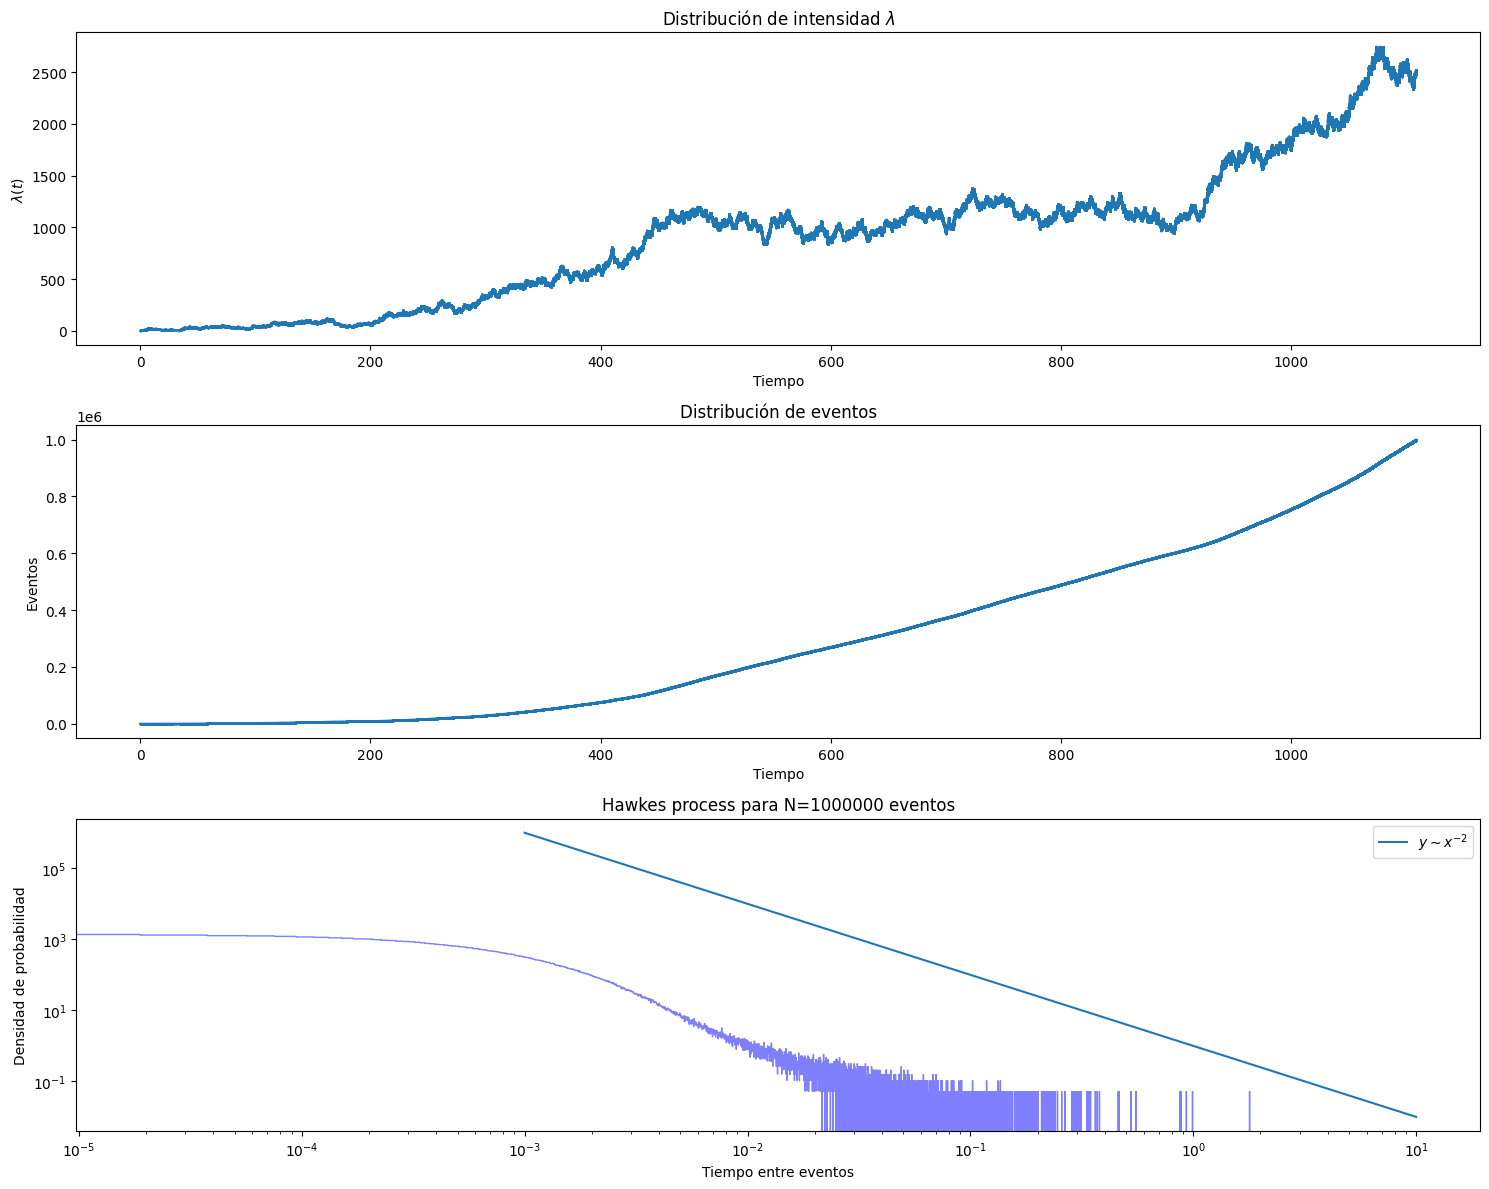

In [4]:
n_events = [0]
times_between_events = [0]
mu = 1
rate = [mu]
N = 10**6
for i in range(N): 
    rate_tk, xk = algorithm(rate[-1], mu, 1)
    rate.append(rate_tk)
    times_between_events.append(xk)
    n_events.append(i + 1)

times = np.cumsum(times_between_events)

fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(3,1)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(times, rate, marker = 'o', ms=0.5 ,drawstyle = 'steps')
ax0.set_title('Distribución de intensidad $\lambda$')
ax0.set_xlabel('Tiempo')
ax0.set_ylabel('$\lambda (t)$')

ax1 = fig.add_subplot(axgrid[2,0])
x = np.arange(0,10,0.001)
y = 1/x**2
ax1.plot(x, y, label = '$y\sim x^{-2}$')
ax1.hist(times_between_events, bins='auto', density=True, log=True, alpha=0.5, color='blue', histtype='step' )
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title(f'Hawkes process para N={n_events[-1]} eventos')
ax1.legend()
ax1.set_xlabel('Tiempo entre eventos')
ax1.set_ylabel('Densidad de probabilidad')

ax2 = fig.add_subplot(axgrid[1,0])
ax2.plot(times, n_events, marker = 'o', ms=0.5 , drawstyle = 'steps-post')
ax2.set_title('Distribución de eventos')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Eventos')


fig.tight_layout()
plt.show()

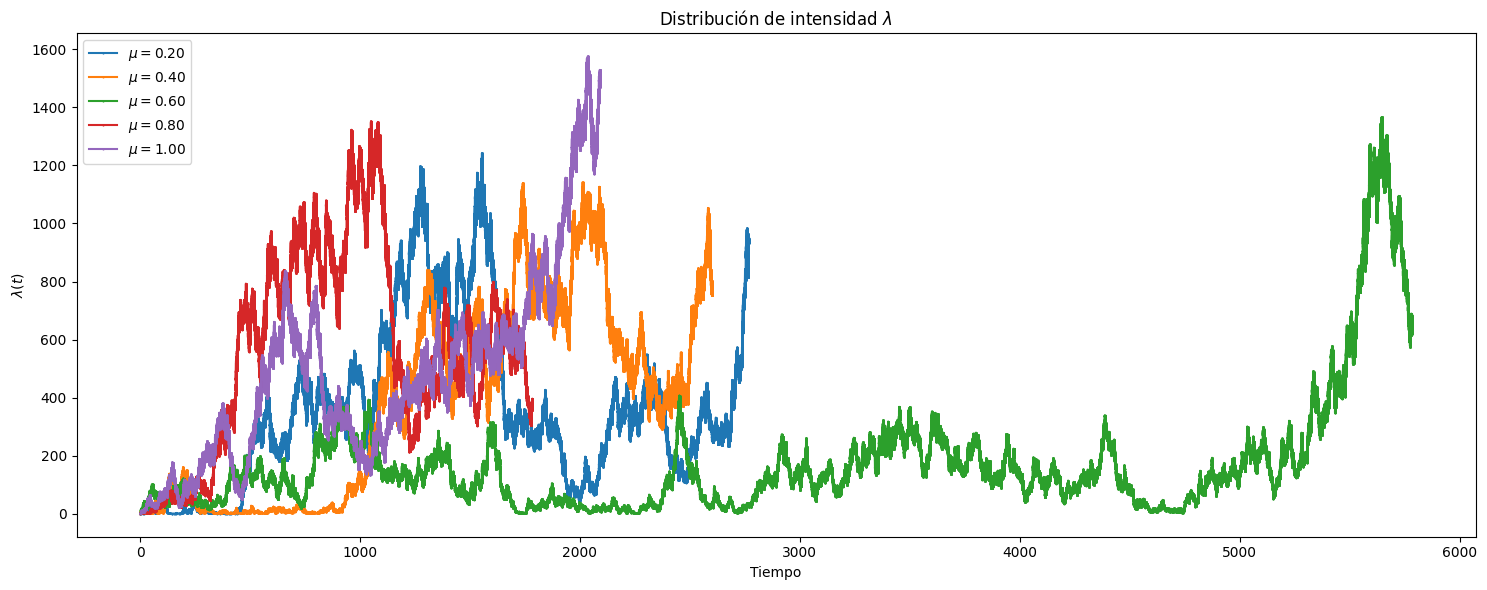

In [5]:
n = 1
mus = np.arange(0.2, 1.2, 0.2)
plt.figure(figsize=(15, 6))
for mu in mus:
    n_events = [0]
    times_between_events = [0]
    rate = [mu]
    for i in range(N): 
        rate_tk, xk = algorithm(rate[-1], mu, n)
        rate.append(rate_tk)
        times_between_events.append(xk)
        n_events.append(i + 1)
    times = np.cumsum(times_between_events)
    plt.plot(times, rate, marker = 'o', ms=0.5 , drawstyle = 'steps', label = f'$\mu={mu:.2f}$')


plt.xlabel('Tiempo')
plt.ylabel('$\lambda (t)$')
plt.title('Distribución de intensidad $\lambda$')
plt.legend()
plt.tight_layout()
plt.show()


# Percolation Strength $P_{\infty}$ plots

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ...  True  True  True]
[ True  True False ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]


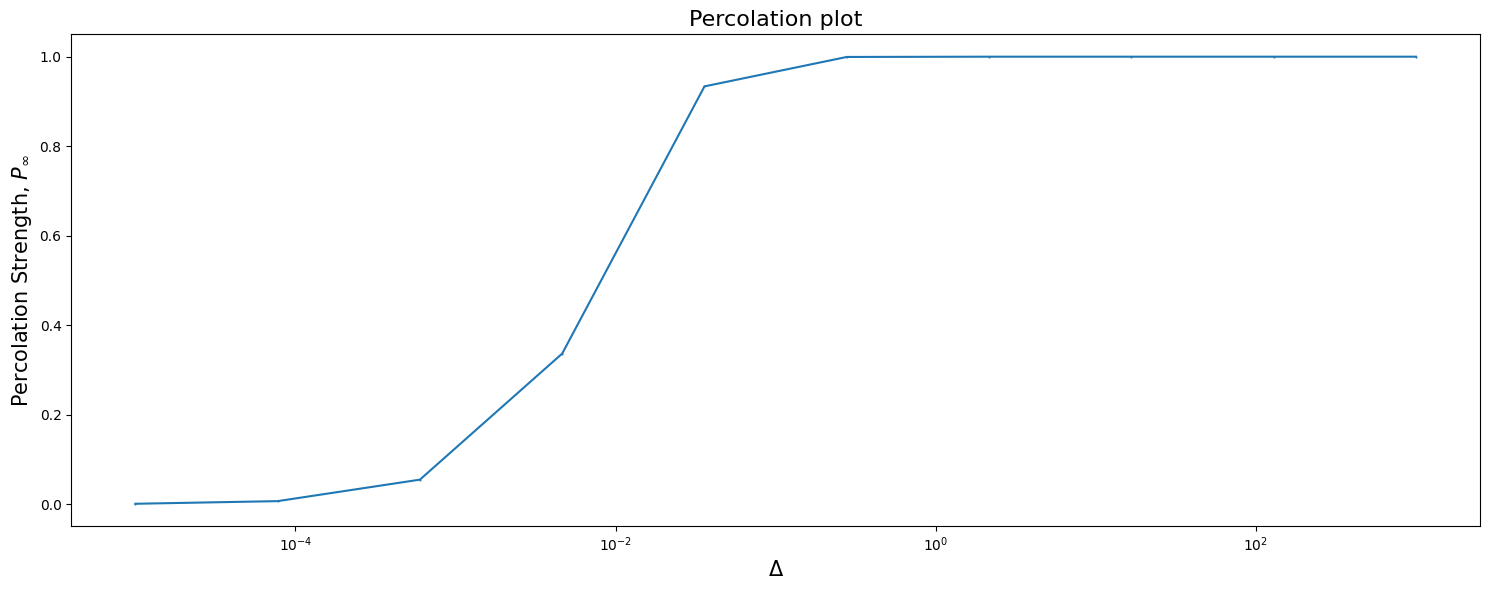

In [6]:
# Generate temporal series
N = 10**4
n = 1
mu = 1
n_events = np.arange(0, N+1)
times_between_events = [0]
rate = [mu]
for i in range(N): 
    rate_tk, xk = algorithm(rate[-1], mu, n)
    rate.append(rate_tk)
    times_between_events.append(xk)
times = np.cumsum(times_between_events)

percolations =[]
deltas =np.logspace(-5, 3, num=10, base=10)

for delta in deltas:
    percolations.append(np.sum((times_between_events) < delta)/N)
    print((times_between_events) < delta)

plt.figure(figsize=(15, 6))
plt.plot(deltas, percolations, marker = 'o', ms=0.5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength, $P_{\infty}$', fontsize=15)
plt.title('Percolation plot', fontsize=16)
plt.tight_layout()
plt.show()



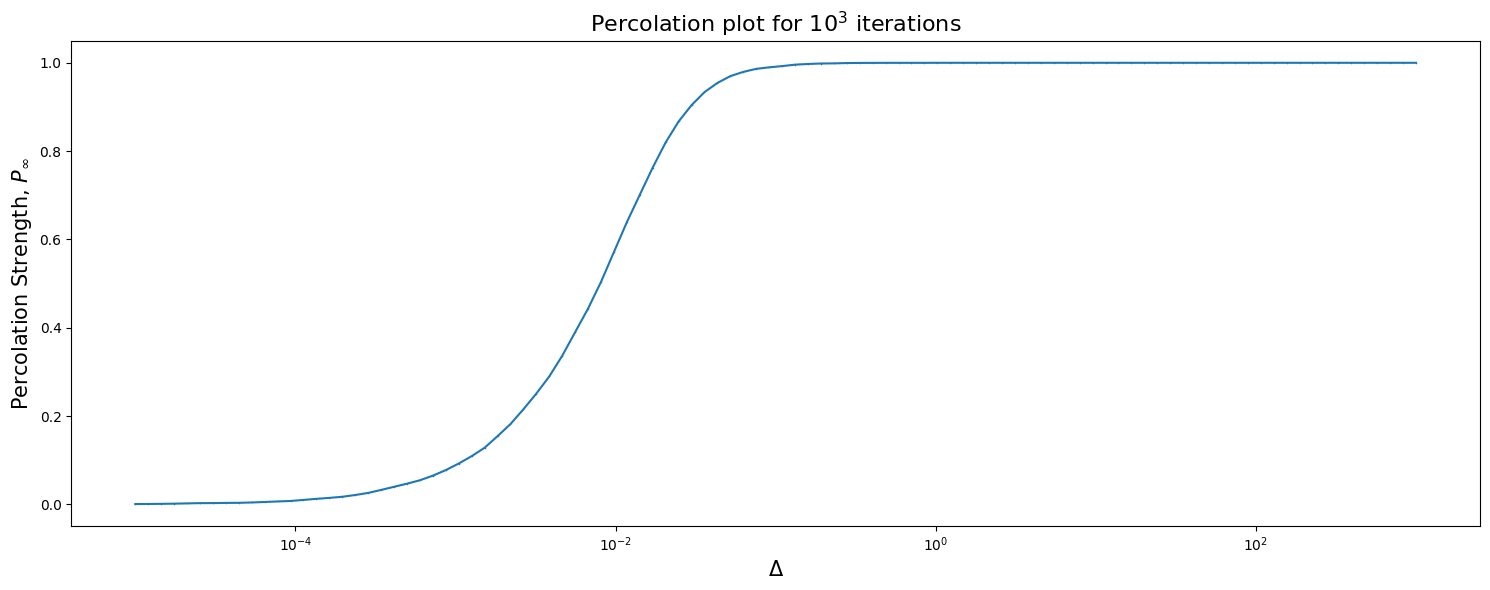

In [7]:
deltas =np.logspace(-5, 3, num=100, base=10)
percolations_means = []
percolation_strength_list = []
n_iters = 1000

for _ in range(n_iters):
    percolations = []
    for delta in deltas:
        percolations.append(np.sum((times_between_events) < delta)/N)
    percolation_strength_list.append(percolations)
    #print(_)
percolations_means = np.mean(percolation_strength_list, axis=0)

plt.figure(figsize=(15, 6))
plt.plot(deltas, percolations_means, marker = 'x', ms=0.5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength, $P_{\infty}$', fontsize=15)
plt.title('Percolation plot for $10^3$ iterations', fontsize=16)
plt.tight_layout()
plt.show()

Número de clusters:  793
Número de clusters:  796
Número de clusters:  805
Número de clusters:  809
Número de clusters:  819
Número de clusters:  821
Número de clusters:  831
Número de clusters:  842
Número de clusters:  848
Número de clusters:  858
Número de clusters:  865
Número de clusters:  872
Número de clusters:  878
Número de clusters:  888
Número de clusters:  895
Número de clusters:  902
Número de clusters:  910
Número de clusters:  924
Número de clusters:  934
Número de clusters:  940
Número de clusters:  950
Número de clusters:  958
Número de clusters:  969
Número de clusters:  976
Número de clusters:  988
Número de clusters:  1001
Número de clusters:  1012
Número de clusters:  1022
Número de clusters:  1027
Número de clusters:  1035
Número de clusters:  1045
Número de clusters:  1053
Número de clusters:  1062
Número de clusters:  1068
Número de clusters:  1080
Número de clusters:  1087
Número de clusters:  1096
Número de clusters:  1104
Número de clusters:  1114
Número de c

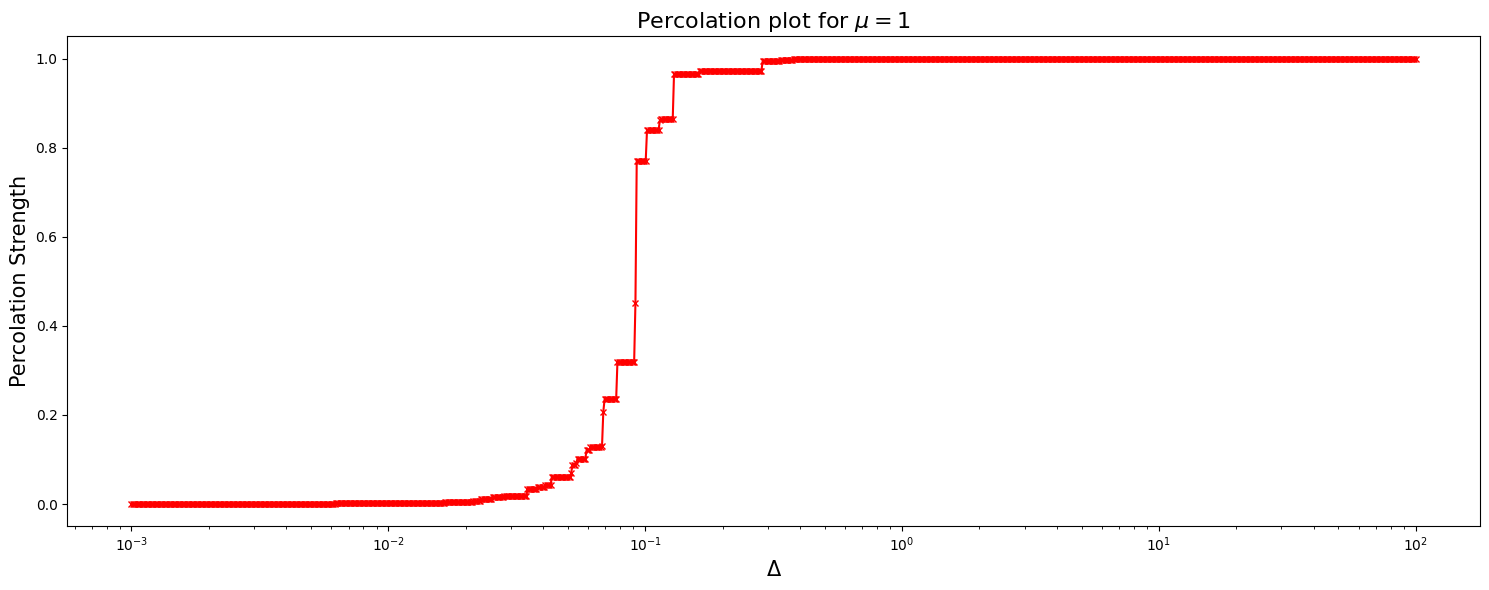

In [8]:
def calculate_percolation_strength(times_between_events, deltas):
    percolation_strengths = []

    for delta in deltas:
        cluster_sizes = []
        # Initialize the size of the current cluster
        current_cluster_size = 1 # The first event is always a cluster

        for i in range(len(times_between_events)):
            if times_between_events[i] <= delta:
                current_cluster_size += 1
            else:
                if current_cluster_size > 1: # Only consider clusters with more than one event
                    cluster_sizes.append(current_cluster_size)
                # Reset the size of the current cluster
                current_cluster_size = 1 # The next event is always a cluster

        # Add the size of the last cluster
        if current_cluster_size > 1: # Only consider clusters with more than one event
            cluster_sizes.append(current_cluster_size)

        max_cluster_size = max(cluster_sizes) 

        percolation_strengths.append(max_cluster_size / len(times_between_events))
        print('Número de clusters: ', len(cluster_sizes))
    return percolation_strengths


# Definir los valores de delta
deltas = np.logspace(-3, 2, num=1000, base=10)

# Calcular la fuerza de percolación
percolation_strengths = calculate_percolation_strength(times_between_events, deltas)

# Graficar la fuerza de percolación en función de delta
plt.figure(figsize=(15, 6))
plt.plot(deltas, percolation_strengths, color='red', marker='x', ms=5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength', fontsize=15)
plt.title(f'Percolation plot for $\mu=${mu}', fontsize=16)
plt.tight_layout()
plt.show()


In [9]:
percolation_strengths_list = []
n_iters = 100
deltas = np.logspace(-2, 3, num=1000, base=10)
for _ in range(n_iters):
    percolation_strength = calculate_percolation_strength(times, deltas)
    percolation_strengths_list.append(percolation_strength)
    #print(f'Iteration {_} done')
mean_percolation_strengths = np.mean(percolation_strengths_list, axis=0)


plt.figure(figsize=(15, 6))
plt.plot(deltas, mean_percolation_strengths, color = 'purple', marker='x', ms=5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength', fontsize=15)
plt.title(f'Percolation plot for $\mu=${mu} for $M=${n_iters} iterations', fontsize=16)
plt.tight_layout()
plt.show()

Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de clusters:  1
Número de c

KeyboardInterrupt: 

Modificar el +-1 en el current cluster size en mi algoritmo


Añadir un bucle if para contar el cluster más grande, un cluster empieza en un 0 y acaba en el último 1, los 0 identifican el comienzo de un cluster, puedo fijarme donde están y con np.where ver donde están para después restar y obtener el tamaño del cluster.


Intentar representar las otras gráficas de la probabilidad. Lo de los clusters es realizar las series varias (con el mismo número de eventos) veces hasta que el tamaños de los vectores como cluster sizes llegue a 10^6

In [10]:
# Generate temporal series
N = 10**6 # Number of events
n = 1
mu = 10**-4
delta = 0.1
n_events = np.arange(0, N+1)
times_between_events = [0]
rate = [mu]
for i in range(N): 
    rate_tk, xk = algorithm(rate[-1], mu, n)
    rate.append(rate_tk)
    times_between_events.append(xk)
times = np.cumsum(times_between_events)

Número de clusters:  2706


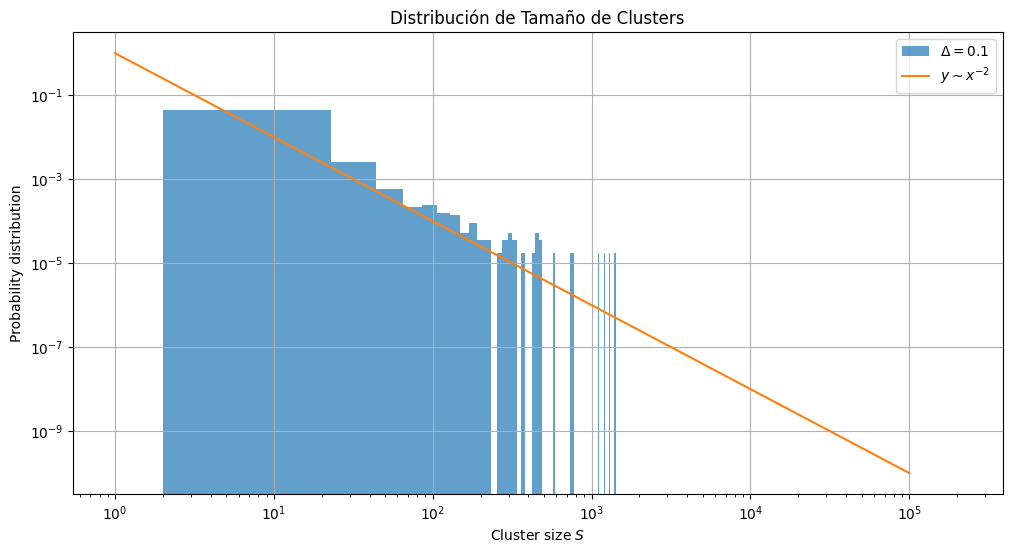

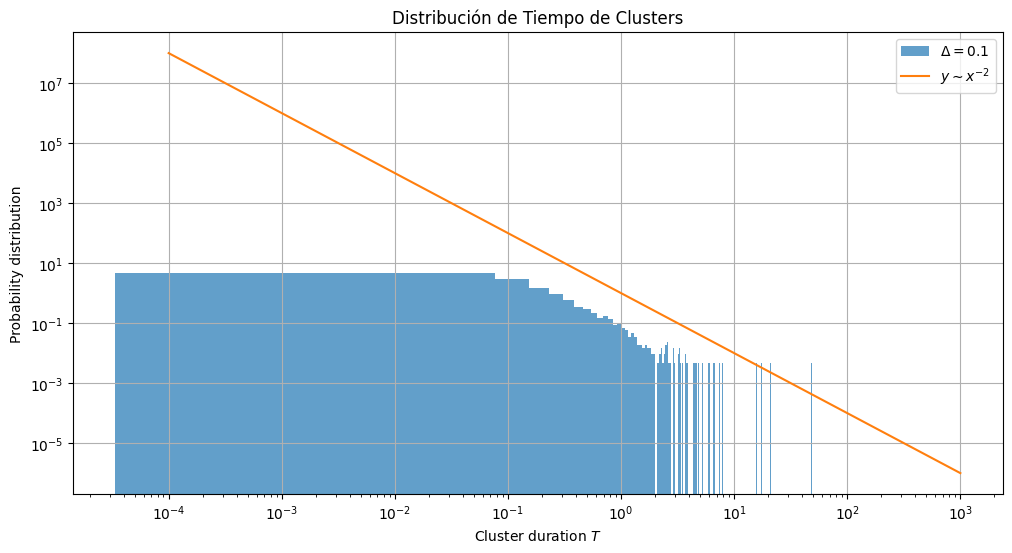

In [32]:
# Función para identificar clusters con un parámetro delta fijo
def identify_clusters(times, delta):
    clusters = []
    current_cluster = []
    for i in range(len(times) - 1):
        if times[i + 1] - times[i] <= delta:
            if not current_cluster:
                current_cluster.append(times[i])
            current_cluster.append(times[i + 1])
        else:
            if current_cluster:
                clusters.append(current_cluster)
                current_cluster = []
    return clusters

# Identificar clusters en la serie temporal
clusters = identify_clusters(times, delta)

# Calcular el tamaño y tiempo de los clusters
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]
print('Número de clusters: ', len(clusters))
x1 = np.logspace(0, 5, num=10000, base=10)
y1 = 1/x1**2

x2 = np.logspace(-4, 3, num=10000, base=10)
y2 = 1/x2**2

# Graficar el diagrama de tamaño de clusters
plt.figure(figsize=(12, 6))
plt.hist(cluster_sizes, bins=10000, log=True, density=True, alpha=0.7, label = '$\Delta = 0.1$')
plt.plot(x1, y1, label = '$y\sim x^{-2}$')
plt.xlabel('Cluster size $S$')
plt.ylabel('Probability distribution')
plt.xscale('log')
plt.yscale('log')
plt.title('Distribución de Tamaño de Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el diagrama de tiempo de clusters
plt.figure(figsize=(12, 6))
plt.hist(cluster_times, bins=10000, log=True, density=True, alpha=0.7, label = '$\Delta = 0.1$')
plt.plot(x2, y2, label = '$y\sim x^{-2}$')
plt.xlabel('Cluster duration $T$')
plt.ylabel('Probability distribution')
plt.xscale('log')
plt.yscale('log')
plt.title('Distribución de Tiempo de Clusters')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
# Parámetros iniciales
N = 10**6
n = 1
mu = 1e-4
delta = 0.1

# Generar la serie temporal de eventos
times = [0]
rate = [mu]
for i in range(N):
    rate_tk, xk = algorithm(rate[-1], mu, 1)
    rate.append(rate_tk)
    times.append(times[-1] + xk)

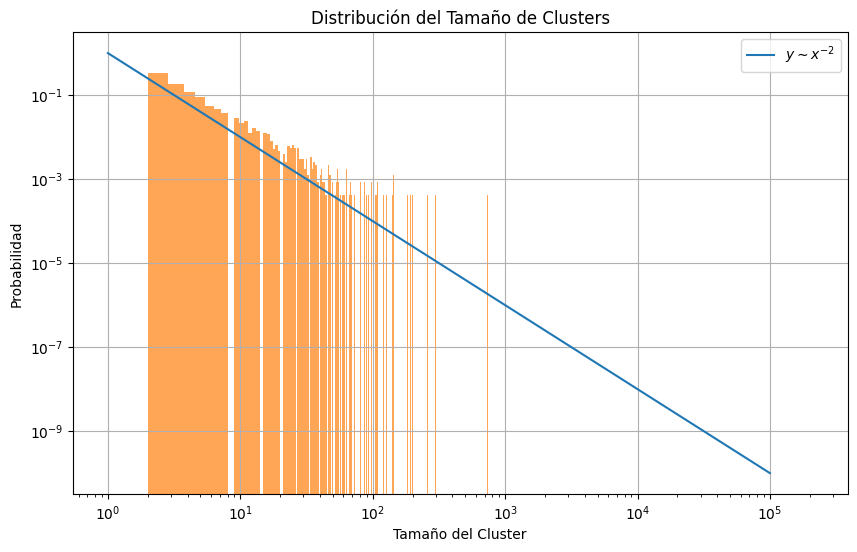

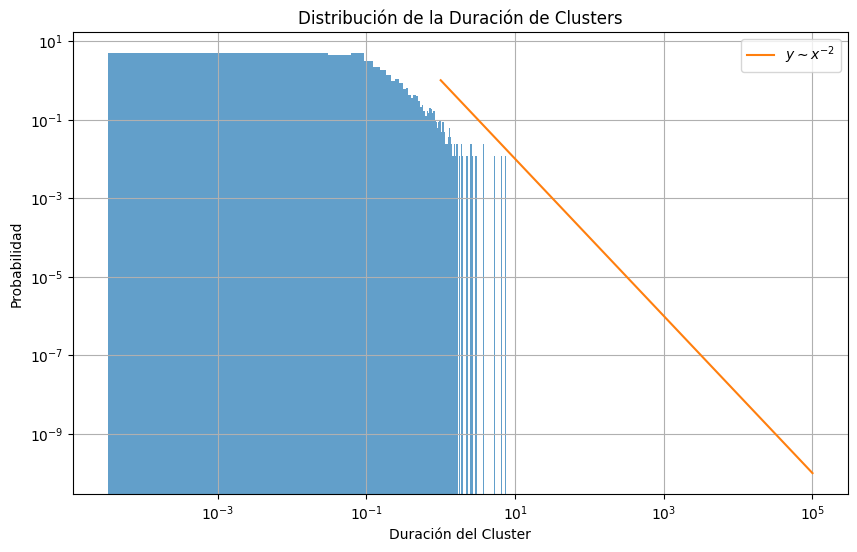

In [44]:
# Función para identificar clusters con un parámetro delta fijo
def identify_clusters(times, delta):
    clusters = []
    current_cluster = []
    for i in range(len(times) - 1):
        if times[i + 1] - times[i] <= delta:
            if not current_cluster:
                current_cluster.append(times[i])
            current_cluster.append(times[i + 1])
        else:
            if current_cluster:
                clusters.append(current_cluster)
                current_cluster = []
    return clusters

# Identificar clusters en la serie temporal
clusters = identify_clusters(times, delta)

# Calcular el tamaño y la duración de los clusters
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_durations = [cluster[-1] - cluster[0] for cluster in clusters]

# Calcular histogramas en escala logarítmica
size_hist, size_bins = np.histogram(cluster_sizes, bins='auto')
duration_hist, duration_bins = np.histogram(cluster_durations, bins='auto')

x1 = np.logspace(0, 5, num=10000, base=10)
y1 = 1/x1**2
# Graficar el histograma del tamaño de los clusters en escala logarítmica
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, label = '$y\sim x^{-2}$')
plt.hist(cluster_sizes, bins=size_bins, density=True, log=True, alpha=0.7)
#plt.plot(size_bins[:-1], size_hist / len(cluster_sizes), marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tamaño del Cluster')
plt.ylabel('Probabilidad')
plt.title('Distribución del Tamaño de Clusters')
plt.grid(True)
plt.legend()
plt.show()

# Graficar el histograma de la duración de los clusters en escala logarítmica
plt.figure(figsize=(10, 6))
plt.hist(cluster_durations, bins=duration_bins, density=True, log=True, alpha=0.7)
#plt.plot(duration_bins[:-1], duration_hist / len(cluster_durations), marker='o')
plt.plot(x1, y1, label = '$y\sim x^{-2}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Duración del Cluster')
plt.ylabel('Probabilidad')
plt.title('Distribución de la Duración de Clusters')
plt.legend()
plt.grid(True)
plt.show()